In [76]:
# libraries
import numpy as np
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

In [50]:
#%%script false --no-raise-error
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
%config InLineBackend.figure_format = 'retina'
%config InLineBackend.savefig_format = 'pdf'
print('Retina screen activated')

Retina screen activated


In [51]:
def to_matrix(distances, dim):
    square_matrix = np.zeros((dim, dim))
    square_matrix[np.triu_indices(dim, k=1)] = distances
    square_matrix += square_matrix.T
    return square_matrix

In [52]:
m_test1 = np.load('results_dictionary_learning_eco/46n_12a_noreg/flow_18.npy')
m_test1 = m_test1.T
m_test2 = np.load('results_dictionary_learning_eco/46n_12a_reg/flow_18.npy')
m_test2 = m_test2.T
m_test1.shape, m_test2.shape

((46, 12), (46, 12))

In [53]:
distances1 = pdist(m_test1, metric='euclidean')
distances2 = pdist(m_test2, metric='euclidean')
distance_matrix1 = to_matrix(distances1, m_test1.shape[0])
distance_matrix2 = to_matrix(distances2, m_test2.shape[0])
distance_matrix1.shape, distance_matrix2.shape

((46, 46), (46, 46))

In [54]:
np.isnan(distance_matrix1).sum(), np.isnan(distance_matrix2).sum()

(np.int64(0), np.int64(0))

In [55]:
np.isinf(distance_matrix1).sum(), np.isinf(distance_matrix2).sum()

(np.int64(0), np.int64(0))

In [56]:
for i in range(distance_matrix1.shape[0]):
    for j in range(distance_matrix1.shape[0]):
        if np.isnan(distance_matrix1[i, j]) or np.isinf(distance_matrix1[i, j]):
            print(f"Invalid distance found in distance_matrix1 at indices ({i}, {j})")
for i in range(distance_matrix2.shape[0]):
    for j in range(distance_matrix2.shape[0]):
        if np.isnan(distance_matrix2[i, j]) or np.isinf(distance_matrix2[i, j]):
            print(f"Invalid distance found in distance_matrix2 at indices ({i}, {j})")

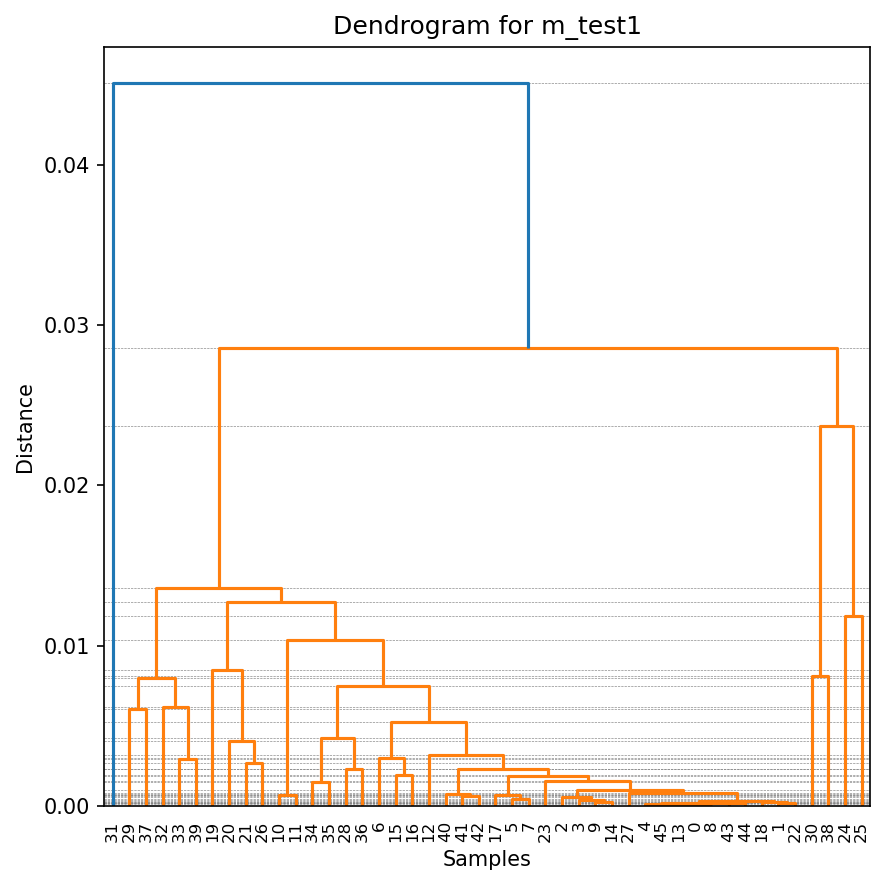

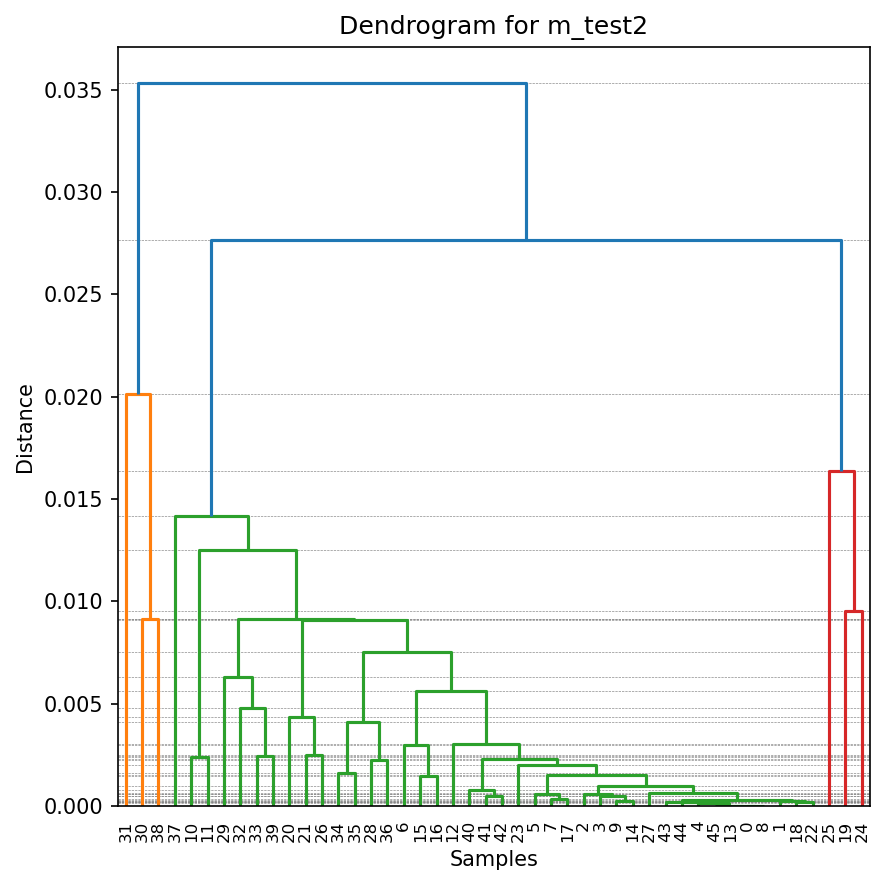

In [75]:
# Ejemplo con tus datos
Z1 = linkage(m_test1, method='complete')
Z2 = linkage(m_test2, method='complete')

def plot_dendro_with_cutlines(Z, title):
    plt.figure(figsize=(6, 6))
    # Distancias a las que se forman fusiones (ordenadas de menor a mayor)
    distances = Z[:, 2]

    # Para k clusters, la línea de corte se dibuja justo por debajo de la fusión (por eso quitamos un pequeño epsilon)
    for d in distances:
        plt.axhline(y=d, color='gray', linestyle='--', linewidth=0.3)

    dendrogram(Z)
    plt.title(title)
    plt.xlabel("Samples")
    plt.ylabel("Distance")

    plt.tight_layout()

    plt.show()

plot_dendro_with_cutlines(Z1, "Dendrogram for m_test1")
plot_dendro_with_cutlines(Z2, "Dendrogram for m_test2")

In [97]:
def plot_silhouette(x, y):
    sample_silhouette_values = silhouette_samples(x, y)
    silhouette_avg = silhouette_score(x, y)
    fig, ax = plt.subplots(figsize=(8, 6))

    y_lower = 10
    n_clusters = len(np.unique(y))

    for i in range(n_clusters):
        # Valores silhouette de las muestras en el clúster i
        ith_cluster_silhouette_values = sample_silhouette_values[y == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # espacio entre clústeres

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_xlabel("Coeficiente silhouette")
    ax.set_ylabel("Muestras")
    ax.set_title(f"Silhouette plot para {n_clusters} clusters - Promedio: {silhouette_avg:.3f}")
    ax.set_yticks([])
    ax.set_xlim([-0.1, 1])
    plt.show()

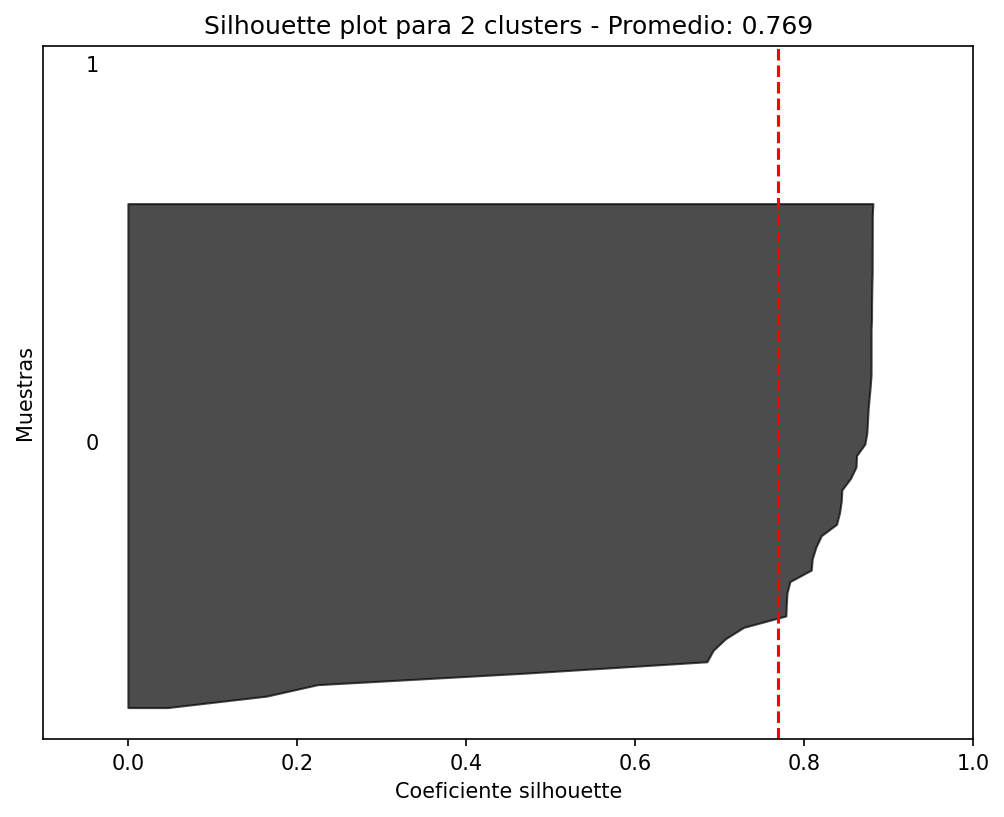

In [98]:
y1 = AgglomerativeClustering(n_clusters=2, linkage='complete').fit_predict(m_test1)

plot_silhouette(m_test1, y1)


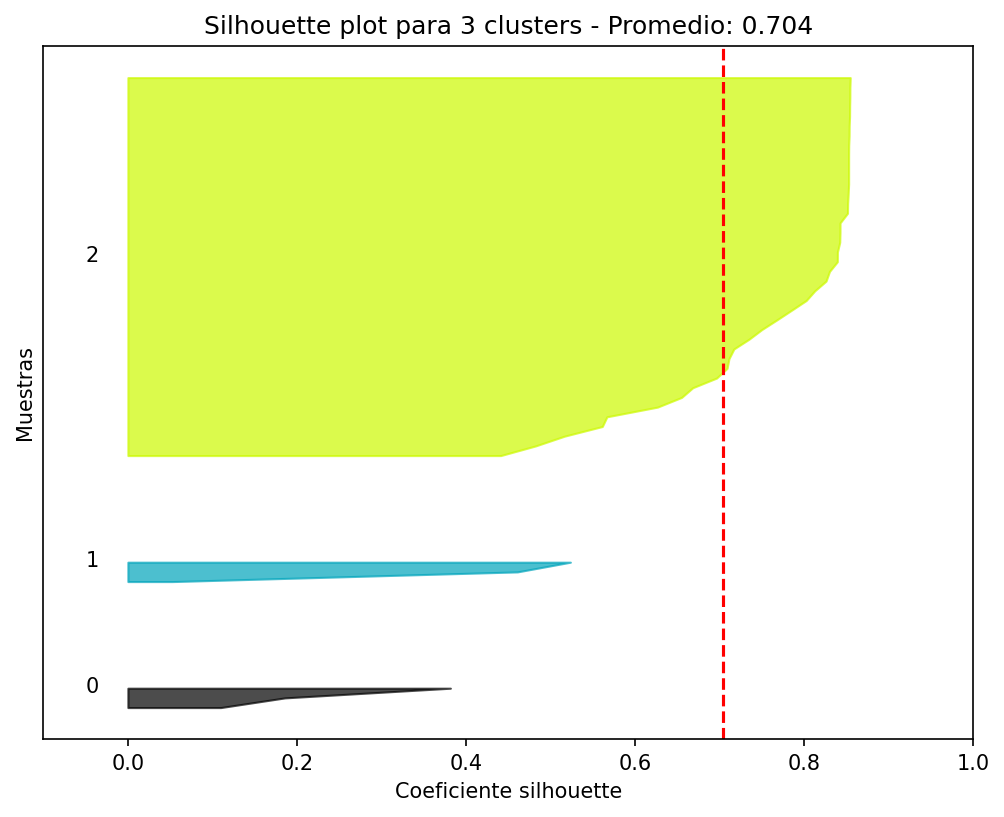

In [103]:
y2 = AgglomerativeClustering(n_clusters=3, linkage='complete').fit_predict(m_test2)

plot_silhouette(m_test2, y2)
